In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy import interpolate

from MuC import collider_tools as col
from MuC import plot_tools as pt
from MuC import MuC


In [7]:
NEVENTS = 1e5

# col_designs = [col.muc_1p5tev, col.muc_3tev, col.muc_10tev, col.muc_30tev, col.mut_2tev, col.mut_2tev_pos_pol]
col_designs = [col.muc_3tev, col.muc_10tev, col.mut_2tev]
col_sims = []
for design in col_designs:
    sim = MuC.BINSimulator(design=design, N_evals = NEVENTS)
    col_sims.append(sim.run())

No lattice specified. Using simplified ring geometry.
Efficiency of detector acceptance: 1.69e-02
Efficiency of detector acceptance: 1.75e-02
Efficiency of detector acceptance: 1.60e-02
Efficiency of detector acceptance: 1.79e-02
Total count: 2.29e+11 events; took 7.56 s.

No lattice specified. Using simplified ring geometry.
Efficiency of detector acceptance: 1.33e-02
Efficiency of detector acceptance: 1.37e-02
Efficiency of detector acceptance: 1.33e-02
Efficiency of detector acceptance: 1.30e-02
Total count: 5.09e+11 events; took 7.13 s.

No lattice specified. Using simplified ring geometry.
Efficiency of detector acceptance: 2.06e-02
Efficiency of detector acceptance: 1.99e-02
Efficiency of detector acceptance: 2.06e-02
Efficiency of detector acceptance: 2.13e-02
Total count: 2.23e+11 events; took 7.1 s.



In [8]:
Nmudecays_in_acc = sim.bunchx_in_a_year/sim.n_turns*sim.design['Nmu_per_bunch']*0.003

Enu_avg = 2e3 # GeV

nTargetsPerCm = 3.72e24 # according to Luc
xSecNC = 1e-39 * Enu_avg
xSecCC = 0.6e-38 * Enu_avg
length1 = 300 # cm
length2 = 100 # cm

prob_single = nTargetsPerCm * (8e-39 * Enu_avg) * length1
elastic = 0.5
prob_double = nTargetsPerCm**2 * xSecNC * xSecCC * length1 * length2 * elastic

def Poisson(rate, k):
    return np.exp(-rate)*rate**k/np.prod(list(range(1,k+1)))

print(f'{prob_single*Nmudecays_in_acc:.2e}, {prob_double*Nmudecays_in_acc:.2e}, {Poisson(prob_single*Nmudecays_in_acc/sim.bunchx_in_a_year, 4):.2e}')

3.28e+10, 9.14e+00, 6.77e-16


NameError: name 'p' is not defined

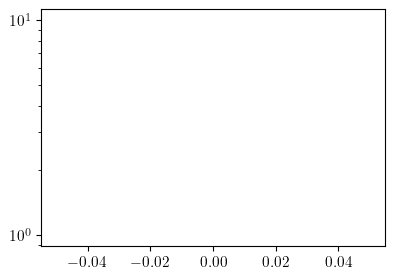

In [9]:
rate = 0.1
x = np.arange(0, 7, 1)
plt.semilogy()
plt.plot(x, p(rate, x)*sim.bunchx_in_a_year, 'o')
plt.plot(x, rate**x*sim.bunchx_in_a_year, 'o')

In [17]:
col_sims[2].exclusive_rates_combined

{('nue', 'CC_light'): 8213812462.368499,
 ('nue', 'CC_charm'): 1229987763.051007,
 ('nue', 'CC_bottom'): 213228.46517497353,
 ('nue', 'NC'): 3596654244.8855987,
 ('nue', 'ES_e'): 13890858.98444542,
 ('nue', 'invdecay_mu'): 0.0,
 ('nue', 'invdecay_tau'): 0.0,
 ('nue', 'pi0_coh'): 771217.3002060454,
 ('nue', 'resonant_rho-'): 0.0,
 ('nue', 'resonant_Kstar-'): 0.0,
 ('nue', 'eee_tri'): 8026359.152059145,
 ('nue', 'eem_tri'): 0.0,
 ('nue', 'eel_tri'): 0.0,
 ('nue', 'eme_tri'): 0.0,
 ('nue', 'emm_tri'): 913712.816319398,
 ('nue', 'eml_tri'): 0.0,
 ('nue', 'ele_tri'): 0.0,
 ('nue', 'elm_tri'): 0.0,
 ('nue', 'ell_tri'): 238808.71313234942,
 ('nue', 'mee_tri'): 0.0,
 ('nue', 'mem_tri'): 9311696.232807677,
 ('nue', 'mel_tri'): 0.0,
 ('nue', 'mme_tri'): 0.0,
 ('nue', 'mmm_tri'): 0.0,
 ('nue', 'mml_tri'): 0.0,
 ('nue', 'mle_tri'): 0.0,
 ('nue', 'mlm_tri'): 0.0,
 ('nue', 'mll_tri'): 0.0,
 ('nue', 'lee_tri'): 0.0,
 ('nue', 'lem_tri'): 0.0,
 ('nue', 'lel_tri'): 4988816.052415203,
 ('nue', 'lme_tri')

In [18]:
def get_all_flavors(dic, channel, flavors=["nue","numu","nuebar","numubar"]):
    if channel == "CC":
        return pt.sci_notation(np.sum([dic[flavor,'CC_light'] for flavor in flavors]) + np.sum([dic[flavor,'CC_charm'] for flavor in flavors]), 1, 1)
    else:
       return pt.sci_notation(np.sum([dic[flavor,channel] for flavor in flavors]), 1, 1)

def get_all_flavors_multichannel(dic, channels, flavors=["nue","numu","nuebar","numubar"]):
    total = 0
    for channel in channels:
        total += np.sum([dic[flavor,channel] for flavor in flavors])
    return pt.sci_notation(total, 1, 1)


## Small table for main text

In [19]:
col_sims_small = [col_sims[1], col_sims[2], col_sims[4]]

In [37]:
perc = "\%"
ncases=len(col_sims)
S = fr"""
\begin{{table}}[t]
  \centering
  \renewcommand{{\arraystretch}}{{1.25}}
  \begin{{ruledtabular}}
  \begin{{tabular}}{{l{ncases*'c'}}}
     $\nu+\bar\nu$ Rates 
     {''.join([f'& {c.design["name"].replace(" 2 TeV", "")} ' for c in col_sims_small])}
    \\
    \hline
    NC
    {''.join([f'& {get_all_flavors(c.exclusive_rates_combined, "NC")} ' for c in col_sims_small])}
    \\
    $\nu_e$ CC
    {''.join([f'& {get_all_flavors(c.exclusive_rates_combined, "CC", flavors=["nue","nuebar"])} ' for c in col_sims_small])}
    \\
    $\nu_\mu$ CC
    {''.join([f'& {get_all_flavors(c.exclusive_rates_combined, "CC", flavors=["numu","numubar"])} ' for c in col_sims_small])}
    \\
    ES $\nu e \to \nu e$
    {''.join([f'& {get_all_flavors(c.exclusive_rates_combined, "ES_e", flavors=["nue","numu","nuebar","numubar"])} ' for c in col_sims_small])}    
    \\
    IMD $\nu e \to \nu \mu$
    {''.join([f'& {get_all_flavors(c.exclusive_rates_combined, "invdecay_mu", flavors=["numu","nuebar"])} ' for c in col_sims_small])}
    \\
    Trident $\nu A \to \nu \ell \ell A$
    {''.join([f'& {get_all_flavors_multichannel(c.exclusive_rates_combined, ["eee_tri","mee_tri","eme_tri","mem_tri","emm_tri","mmm_tri","ell_tri","mll_tri"])} ' for c in col_sims_small])}
    \\ \hline
    Total/(bunch cross.)
    {''.join([f'& {pt.sci_notation((c.facecounts["EC","Total"]+c.facecounts["HC","Total"])/c.bunchx_in_a_year, 1, 1)}' for c in col_sims_small])}
    \\
\end{{tabular}}
  \end{{ruledtabular}}
  \caption{{Total number of neutrino interactions in proposed muon colliders.
  Rates are given for total neutrino and antineutrino composition. Here, ES = elastic scattering, IMD = inverse muon decay, Trident = neutrino trident production on the Coulomb field of nuclei.}}
  \label{{tab:event_rate_makeup}}
\end{{table}}
"""

print(S)


\begin{table}[t]
  \centering
  \renewcommand{\arraystretch}{1.25}
  \begin{ruledtabular}
  \begin{tabular}{lcccccc}
     $\nu+\bar\nu$ Rates 
     & MuC 3 TeV & MuC 10 TeV & $\mu$TRISTAN 
    \\
    \hline
    NC
    & $4.6\times 10^{9}$ & $1.4\times 10^{10}$ & $8.8\times 10^{9}$ 
    \\
    $\nu_e$ CC
    & $5.8\times 10^{9}$ & $1.9\times 10^{10}$ & $1.5\times 10^{10}$ 
    \\
    $\nu_\mu$ CC
    & $6.2\times 10^{9}$ & $1.8\times 10^{10}$ & $8.2\times 10^{9}$ 
    \\
    ES $\nu e \to \nu e$
    & $8.7\times 10^{6}$ & $3.0\times 10^{7}$ & $2.3\times 10^{7}$     
    \\
    IMD $\nu e \to \nu \mu$
    & $1.4\times 10^{7}$ & $3.5\times 10^{7}$ & 0 
    \\
    Trident $\nu A \to \nu \ell \ell A$
    & $2.1\times 10^{7}$ & $8.5\times 10^{7}$ & $3.6\times 10^{7}$ 
    \\ \hline
    Total/(bunch cross.)
    & $1.3\times 10^{-1}$& $2.6\times 10^{-1}$& $3.4\times 10^{-4}$
    \\
\end{tabular}
  \end{ruledtabular}
  \caption{Total number of neutrino interactions in proposed muon colliders.


## Large table for EndMatter

In [2]:
perc = "\%"
ncases=len(col_sims)
S = fr"""
\begin{{table*}}[t]
  \centering
  \renewcommand{{\arraystretch}}{{1.25}}
  \begin{{ruledtabular}}
  \begin{{tabular}}{{l{ncases*'c'}}}
     Collider 
     {''.join([f'& {c.design["name"]} ' for c in col_sims])}
    \\
    \hline
        Beams 
        {''.join([f'& {col.acc_colls_dict[c.design["collision_type"]]}' for c in col_sims])}
    \\
        $\sqrt{{s}}$/TeV 
        {''.join([f'& {c.design["beam_p0"]*2e-3:.0f} ' for c in col_sims])}
    \\
        $C$/km  
        {''.join([f'& {c.design["C"]/1e5:.0f} ' for c in col_sims])}
    \\
        $L_{{\rm s}}$/m 
        {''.join([f'& {c.design["Lss"]:d} ' for c in col_sims])}
    \\  
        $\mathcal{{N_\mu}}/10^{10}$ 
        {''.join([f'& {int(c.design["Nmu_per_bunch"]/1e10):d} ' for c in col_sims])}
    \\  
        $f_{{\rm inj}}/$Hz 
        {''.join([f'& {c.design["finj"]:d} ' for c in col_sims])}
    \\
        Duty factor  
        {''.join([f'& {int(c.design["duty_factor"]*100):d}{perc} ' for c in col_sims])}
    \\  
    \hline\hline
    \multicolumn{ncases+1}{{c}}{{Beam-induced neutrino interaction rate}}
    \\
    \hline
    ECal ($0.15$~kt)
    {''.join([f'& {c.facecounts["EC","Total"]/c.facecounts["Total","Total"]*100:.1f}{perc} ' for c in col_sims])}
    \\
    HCal ($1.4$~kt)
    {''.join([f'& {c.facecounts["HC","Total"]/c.facecounts["Total","Total"]*100:.0f}{perc} ' for c in col_sims])}
    \\
    Muon Sys ($7.5$~kt)
    {''.join([f'& {c.facecounts["MD","Total"]/c.facecounts["Total","Total"]*100:.0f}{perc} ' for c in col_sims])}
    \\
    Nozzles $(0.14$~kt)
    {''.join([f'& {c.facecounts["NO","Total"]/c.facecounts["Total","Total"]*100:.0f}{perc} ' for c in col_sims])}
    \\
    \hline
    Total / bunch cross. 
    {''.join([f'& {c.facecounts["Total","Total"]/c.bunchx_in_a_year:.2g} ' for c in col_sims])}
    \\
    \hline\hline
    \multicolumn{ncases+1}{{c}}{{Rates of exclusive channels in HCAL and ECAL (/year)}}
    \\
    \hline
    Total NC
    {''.join([f'& {get_all_flavors(c.exclusive_rates_combined, "NC")} ' for c in col_sims])}
    \\
    Total $\nu_e$ CC
    {''.join([f'& {get_all_flavors(c.exclusive_rates_combined, "CC", flavors=["nue","nuebar"])} ' for c in col_sims])}
    \\
    Total $\nu_\mu$ CC
    {''.join([f'& {get_all_flavors(c.exclusive_rates_combined, "CC", flavors=["numu","numubar"])} ' for c in col_sims])}
    \\
    \hline
    $\nu_{{e}} e \to \nu_{{e}} e$ 
    {''.join([f'& {get_all_flavors(c.exclusive_rates_combined, "ES_e", flavors=["nue"])} ' for c in col_sims])}    
    \\
    $\nu_{{\mu}} e \to \nu_{{\mu}} e$     
    {''.join([f'& {get_all_flavors(c.exclusive_rates_combined, "ES_e", flavors=["numu"])} ' for c in col_sims])}    
    \\
    $\bar\nu_{{e}} e \to \bar\nu_{{e}} e$ 
    {''.join([f'& {get_all_flavors(c.exclusive_rates_combined, "ES_e", flavors=["nuebar"])} ' for c in col_sims])}    
    \\
    $\bar\nu_{{\mu}} e \to \bar\nu_{{\mu}} e$     
    {''.join([f'& {get_all_flavors(c.exclusive_rates_combined, "ES_e", flavors=["numubar"])} ' for c in col_sims])}    
    \\\hline
    $\nu_\mu e \to \nu_e \mu^-$ 
    {''.join([f'& {get_all_flavors(c.exclusive_rates_combined, "invdecay_mu", flavors=["numu"])} ' for c in col_sims])}
    \\  
    $\bar\nu_e e \to \bar\nu_\mu \mu^-$ 
    {''.join([f'& {get_all_flavors(c.exclusive_rates_combined, "invdecay_mu", flavors=["nuebar"])} ' for c in col_sims])}
    \\  
    $\bar\nu_e e \to \bar\nu_\tau \tau^-$ 
    {''.join([f'& {get_all_flavors(c.exclusive_rates_combined, "invdecay_tau", flavors=["nuebar"])} ' for c in col_sims])}
    \\\hline
    $\nu_{{e}} A \to \nu e^+e^- A$ 
    {''.join([f'& {get_all_flavors(c.exclusive_rates_combined, "eee_tri")} ' for c in col_sims])}
    \\
    $\nu_{{\mu}} A \to \nu e^+e^- A$
    {''.join([f'& {get_all_flavors(c.exclusive_rates_combined, "mee_tri")} ' for c in col_sims])}
    \\
    $\nu_{{e}} A \to \nu \mu^\pm e^\mp A$ 
    {''.join([f'& {get_all_flavors(c.exclusive_rates_combined, "eme_tri")} ' for c in col_sims])}
    \\
    $\nu_{{\mu}} A \to \nu \mu^\pm e^\mp A$
    {''.join([f'& {get_all_flavors(c.exclusive_rates_combined, "mem_tri")} ' for c in col_sims])}
    \\
    $\nu_{{e}} A \to \nu \mu^+\mu^- A$ 
    {''.join([f'& {get_all_flavors(c.exclusive_rates_combined, "emm_tri")} ' for c in col_sims])}
    \\
    $\nu_{{\mu}} A \to \nu \mu^+\mu^- A$
    {''.join([f'& {get_all_flavors(c.exclusive_rates_combined, "mmm_tri")} ' for c in col_sims])}
    \\
    $\nu_{{e}} A \to \nu \tau^+\tau^- A$ 
    {''.join([f'& {get_all_flavors(c.exclusive_rates_combined, "ell_tri")} ' for c in col_sims])}
    \\
    $\nu_{{\mu}} A \to \nu \tau^+\tau^- A$
    {''.join([f'& {get_all_flavors(c.exclusive_rates_combined, "mll_tri")} ' for c in col_sims])}
    \\\hline
    $\nu A \to \nu \pi^0 A$ 
    {''.join([f'& {get_all_flavors(c.exclusive_rates_combined, "pi0_coh")} ' for c in col_sims])}
    \\
\end{{tabular}}
  \end{{ruledtabular}}
  \caption{{Total number of neutrino interactions in proposed muon collider detectors. The makeup of the event rate is shown as percentages for each detector component, excluding the magnetic solenoid.}}
  \label{{tab:event_rate_makeup}}
\end{{table*}}
"""

print(S)

NameError: name 'col_sims' is not defined

In [9]:
for csim in col_sims:
    print(csim.design['name'])
    print(csim.print_face_counts(percentage=True))
    for sim in csim.sims:
        sim.get_exclusive_rates()
        print(sim.print_exclusive_counts())

MuC 1.5 TeV
+------------------+----------+----------+--------------+------------+--------------+
|  Det component   |  Total   | nue_left | nuebar_right | numu_right | numubar_left |
+------------------+----------+----------+--------------+------------+--------------+
|       ecal       |   2.1%   |   1.8%   |     2.6%     |    2.2%    |      2%      |
|       hcal       |   13%    |   13%    |     14%      |    13%     |     12%      |
|  muon_detector   |   33%    |   34%    |     32%      |    33%     |     30%      |
|     nozzles      |   51%    |   50%    |     50%      |    51%     |     54%      |
| solenoid_borders |  0.53%   |  0.55%   |    0.51%     |   0.54%    |    0.51%     |
|   solenoid_mid   |  0.74%   |  0.68%   |    0.74%     |   0.81%    |    0.71%     |
|      Total       | 1.68e+11 | 5.60e+10 |   3.15e+10   |  5.18e+10  |   2.83e+10   |
|   Total/bunchx   | 5.40e-01 | 1.81e-01 |   1.02e-01   |  1.67e-01  |   9.13e-02   |
+------------------+----------+----------+

In [23]:
Nevents = 1e6
# DIREC = 'GENANA'
DIREC = None
# version = 'old_Aug6/'
version = 'Q2_'

data1 = dg.load_data(f'{version}mucols2_numu.txt', n_events = Nevents, direc = DIREC, getQ=True)  #this is my variable for the directory in which my .txt files are.
data2 = dg.load_data(f'{version}mucols2_nue.txt', n_events = Nevents, direc = DIREC, getQ=True) 
data = pd.concat([data1, data2], axis = 0)

data11 = dg.load_data(f'{version}mokhov_numu.txt', n_events = Nevents, direc = DIREC, getQ=True)  #this is my variable for the directory in which my .txt files are.
data21 = dg.load_data(f'{version}mokhov_nue.txt', n_events = Nevents, direc = DIREC, getQ=True) 
datam = pd.concat([data11, data21], axis = 0)

datat = dg.load_data(f'{version}muTs.txt', n_events = Nevents, direc = DIREC, getQ=True) 

Loading generated data for a IMCC-II experiment;
It includes interactions from ν_μ, anti ν_μ within the MD, SB, SM, HC, EC, NO of the muon detector.
Adding weights...
Computing Q2...
Done!
Loading generated data for a IMCC-II experiment;
It includes interactions from ν_e, anti ν_e within the MD, SB, SM, HC, EC, NO of the muon detector.
Adding weights...
Computing Q2...
Done!
Loading generated data for a Mohkov et al. (Fermilab) experiment;
It includes interactions from ν_μ, anti ν_μ within the MD, SB, SM, HC, EC, NO of the muon detector.
Adding weights...
Computing Q2...
Done!
Loading generated data for a Mohkov et al. (Fermilab) experiment;
It includes interactions from ν_e, anti ν_e within the MD, SB, SM, HC, EC, NO of the muon detector.
Adding weights...
Computing Q2...
Done!
Loading generated data for a $\mu$TRISTAN (s) experiment;
It includes interactions from ν_e, anti ν_μ within the MD, SB, SM, HC, EC, NO of the muon detector.
Adding weights...
Computing Q2...
Done!


In [2]:
tex_labels = {}
tex_labels['e'] = r'e'
tex_labels['m'] = r'\mu'
tex_labels['l'] = r'\tau'
from DarkNews import plot_tools as pt


In [ ]:
leptonic_electron=True
leptonic_trident=True
XLOG = False
experiment = 'imcc'
Emu_dic = {'mutristan':1e3, 'imcc':5e3, 'map':0.750e3}
Emu = Emu_dic[experiment]
if XLOG:
    E = np.geomspace(10, 3*Emu, 100)
    Ebins = np.geomspace(10, 3*Emu, 20, endpoint=True)
else:
    E = np.linspace(10, Emu, 100)
    Ebins = np.linspace(10, 3*Emu, 20, endpoint=True)

rate, _ = np.histogram(nus_muT['E'], bins = Ebins, weight = nus_muT['w'])
# Rates = {'mutristan': nus_muT['w'], 'imcc': nus_mucol['w'], 'map': nus_mokhov['w']}


In [38]:
("Q2_muTs")

'Q2_muTs'

In [43]:

# IMCC_genie = GenieEvents(['Q2_mucols2_numu.txt', 'Q2_mucols2_nue.txt'], Nevents = 1e6, DIREC = None)
MAP_genie  = GenieEvents(['Q2_mokhov_numu.txt', 'Q2_mokhov_nue.txt'], Nevents = 1e6, DIREC = None)
# MuT_genie  = GenieEvents('Q2_muTs.txt', Nevents = 1e6, DIREC = None)

Loading generated data for a Mohkov et al. (Fermilab) experiment;
It includes interactions from ν_μ, anti ν_μ within the MD, SB, SM, HC, EC, NO of the muon detector.
Adding weights...
Computing Q2...
Done!
Loading generated data for a Mohkov et al. (Fermilab) experiment;
It includes interactions from ν_e, anti ν_e within the MD, SB, SM, HC, EC, NO of the muon detector.
Adding weights...
Computing Q2...
Done!
[        DComp     nu_E  IncL  OutL         E        px        py        pz  w  \
0          MD  281.471    14    13  207.4110  0.621914 -7.969120  207.2570  0   
1          MD  133.503    14    13   55.2705 -5.510440 -0.190327   54.9946  0   
2          MD  493.802    14    13  439.7090  4.572580  5.095820  439.6560  0   
3          MD  395.751    14    13  236.3390  0.200687 -2.140680  236.3290  0   
4          MD  355.976    14    14  149.8800 -0.506877  1.192840  149.8740  0   
...       ...      ...   ...   ...       ...       ...       ...       ... ..   
1199995    NO  531.0

In [18]:
# fig, ax = pt.std_fig(figsize=(5, 5))
fig = plt.figure(figsize=(5.0, 5.))
gs = gridspec.GridSpec(2, 1, height_ratios=[4, 1], hspace=0.1)

ax = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

# ax.plot(E, 0.66e-38*E/E, ls='-', label=r'$\nu_e$CC', c='black', lw=1.5)
# ax.plot(E, 0.33e-38*E/E, ls=(1,(3,1)), label=r'$\bar\nu_e$CC', c='black', lw=1.5)
# e, sigma = np.loadtxt('rare_xsecs/tot_xsec_lightquarks.dat', unpack=True)
data_p = np.genfromtxt('rare_xsecs/Alfonso_data_proton.dat').T
data_n = np.genfromtxt('rare_xsecs/Alfonso_data_neutron.dat').T
sigma_CC_nu = interpolate.interp1d(data[0], (data_n[1]+data_p[1])/2*1e-36, kind='linear', fill_value='extrapolate', bounds_error=False)
ax.plot(E, sigma_CC_nu(E)/E, ls='-', label=r'$\nu_e$CC', c='black', lw=1.5)
ax.plot(E, 0.289/0.66*sigma_CC_nu(E)/E, ls='-', label=r'$\nu$NC', c='lightgrey', lw=1.5)

data_p = np.genfromtxt('rare_xsecs/Alfonso_data_proton.dat').T
data_n = np.genfromtxt('rare_xsecs/Alfonso_data_neutron.dat').T
sigma_CC_nubar = interpolate.interp1d(data[0], (data_n[6]+data_p[6])/2*1e-36, kind='linear', fill_value='extrapolate', bounds_error=False)
ax.plot(E, sigma_CC_nubar(E)/E, ls=(1,(3,1)), label=r'$\bar\nu_e$CC', c='black', lw=1.5)
ax.plot(E, 0.289/0.66*sigma_CC_nubar(E)/E, ls=(1,(3,1)), label=r'$\bar\nu$NC', c='lightgrey', lw=1.5)


data_p = np.genfromtxt('rare_xsecs/Alfonso_data_proton.dat').T
data_n = np.genfromtxt('rare_xsecs/Alfonso_data_neutron.dat').T
sigma_charm_nu = interpolate.interp1d(data[0], (data_n[1]*data_n[3]+data_p[1]*data_p[3])/2*1e-36, kind='linear', fill_value=np.nan, bounds_error=False)
ax.plot(E, sigma_charm_nu(E)/E, ls='-', label=r'$\nu_e$CC (charm)', c='orange', lw=1.5)

data_p = np.genfromtxt('rare_xsecs/Alfonso_data_proton.dat').T
data_n = np.genfromtxt('rare_xsecs/Alfonso_data_neutron.dat').T
sigma_charm_nubar = interpolate.interp1d(data[0], (data_n[6]*data_n[8]+data_p[6]*data_p[8])/2*1e-36, kind='linear', fill_value=np.nan, bounds_error=False)
ax.plot(E, sigma_charm_nubar(E)/E, ls=(1,(3,1)), label=r'$\bar\nu_e$CC (charm)', c='orange', lw=1.5)


e, ratio = np.loadtxt('rare_xsecs/tot_xsec_cohpi0_C.dat', unpack=True)
sigma_cohpi0 = interpolate.interp1d(e, ratio*1e-40/12, kind='linear', fill_value=ratio[-1]*1e-40/12, bounds_error=False)
ax.plot(E, sigma_cohpi0(E)/E, ls=(1,(3,1)), label=r'coh$\pi^0$', c='gray')

if leptonic_electron:
    sigma_e_nu = lambda x: total_cross_section(x, nuf='e', anu=False)
    dsigma = np.sqrt(sigma_e_nu(Ebins)/sigma_CC_nu(Ebins)*Rates[experiment])/Rates[experiment] * sigma_CC_nu(Ebins)
    ax.plot(E, sigma_e_nu(E)/E, ls='-', label=r'$\nu_e - e$', c='deeppink')
    plt.fill_between(Ebins, (sigma_e_nu(Ebins) - dsigma)/Ebins, (sigma_e_nu(Ebins) + dsigma)/Ebins, color='deeppink', alpha=0.2)
    # ax.plot(E, total_cross_section(E, nuf='e', anu=True)/E, ls=(1,(3,1)), label=r'$\bar\nu_e - e$', c='deeppink')

if leptonic_trident:

    flavors = ['e','m','l']
    targets = ['O16']
    colors = iter(['lightblue', 'dodgerblue', 'blue', 'lightgreen', 'darkgreen', 'darkgreen'])
    for target in targets:
        for nui in flavors:
            for nuf in flavors:
                for minus_lep in flavors:
                    for plus_lep in flavors:
                        if not nui == 'l' and not nui == 'm':
                            try:                
                                xsec = np.loadtxt(f'rare_xsecs/trident_production/v{nui}{target}TOv{nuf}{minus_lep}{plus_lep.capitalize()}X_tot.dat').T
                                label = fr'$\nu_{tex_labels[nui]} \to {tex_labels[minus_lep]}^- \nu_{tex_labels[nuf]} {tex_labels[plus_lep]}^+$'
                            except FileNotFoundError:
                                try:
                                    xsec = np.loadtxt(f'rare_xsecs/trident_production/v{nui}{target}TO{minus_lep}v{nuf}{plus_lep.capitalize()}X_tot.dat').T
                                    label = fr'$\nu_{tex_labels[nui]} \to {tex_labels[minus_lep]}^-\nu_{tex_labels[nuf]} {tex_labels[plus_lep]}^+$'
                                except FileNotFoundError:
                                    continue
                            c = next(colors)
                            if minus_lep == 'e':
                                ax.plot(xsec[0], xsec[1]/xsec[0]/16,'-', lw=1.5, label=label, color=c, ls=(1,(2,0.5)))
                            else:
                                ax.plot(xsec[0], xsec[1]/xsec[0]/16,'-', lw=1.5, label=label, color=c)


LS = '-'# (1,(3,0.5))
LW = 1.5
yunits=1e9
bins = np.geomspace(10, Emu, 100) if XLOG else np.linspace(10, Emu, 100)

if experiment == 'map':
    ax2.hist(nus_mokhov['E'], weights=nus_mokhov['w'] / yunits,
             bins=bins, histtype='stepfilled', edgecolor='black', facecolor='whitesmoke', zorder=2, lw=LW*0.5, ls=LS, label=r'MAP', density=True)
elif experiment == 'mutristan':
    ax2.hist(nus_muT['E'], weights=nus_muT['w'] / yunits,
            bins=bins, histtype='stepfilled', edgecolor='black', facecolor='whitesmoke', zorder=2, lw=LW*0.5, ls=LS, label=r'$\mu$TRISTAN', density=True)
elif experiment == 'imcc':
    ax2.hist(nus_mucol['E'] , weights=nus_mucol['w'] / yunits,
             bins=bins, histtype='stepfilled', edgecolor='black', facecolor='whitesmoke', zorder=2, lw=LW*0.5, ls=LS, label=r'IMCC', density=True)
else: 
    print("No experiment selected")

ax2.set_ylabel(r'rate  (a.u.)')
ax2.set_xlabel(r'$E_{\nu}$ [GeV]')
ax2.legend(loc='upper right', ncol=1, frameon=True, fontsize=8.5, framealpha=0.9, edgecolor='None')

ax.set_ylim(1e-45, 2e-38)
# ax.set_xlabel(r'$E_{\nu}$ [GeV]')
if XLOG:
    ax.set_xlim(1e1, 3*Emu)
    ax2.set_xlim(1e1, 3*Emu)
    ax.set_xscale('log')
    ax2.set_xscale('log')
    ax2.set_yscale('log')
else:
    ax.set_xlim(1e1, Emu)
    ax2.set_xlim(1e1, Emu)
ax.set_yscale('log')
ax.set_xticklabels([])
ax.set_ylabel(r'$\sigma_{\rm nucleon\, or\, e}/E_\nu$ [cm$^2$/GeV]')
ax.set_title(r'$\nu_e$ cross sections')
# ax.legend(loc='lower right', ncol=2, frameon=True, fontsize=8.5, framealpha=0.9, edgecolor='None')

fig.savefig('plots/paper_plots/cross_sections_tri.pdf', bbox_inches='tight')

4.881307272727272e-37